# HEART DISEASE PROGNOSIS
- In this project, we predict whether the patient is suffering from a heart disease or not using machine learning algorithms by determining the patient record data.
- The data set is collected from KAGGLE (https://www.kaggle.com/ronitf/heart-disease-uci)
- The guide for the dataset is given by (https://www.kaggle.com/onatto/predicting-heart-disease-a-detailed-guide)

## Importing Libraries and Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- Most of the features are categorical and the data type assigned is int, so it should be changed to object form.

## Data Preprocessing
In this section we will:
- Handle Missing Values (if any)
- Format the data for proper recognisition.
- Change the data types accordingly for categorical and continuous variables.

In [20]:
#changing the names of the columns for better interpretation.
df.columns = ['Age', 'Sex', 'ChestPain_type', 'Resting_BP', 'Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_HeartRate',
       'Exercise_Induced_Angina', 'ST_Depression', 'ST_slope', 'Major_Vessels', 'Thalassemia', 'Target']
df.head()

,Age,Sex,ChestPain_type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate,Exercise_Induced_Angina,ST_Depression,ST_slope,Major_Vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
#creating a new data frame and defining the categorical data for better analysis.
data = df.copy()

#defining categories
#gender
def gender(x):
    if x==1:
        return 'Male'
    else:
        return 'Female'
    
#fasting blood sugar
def fbs(x):
    if x==1:
        return '>120mg/dL'
    else:
        return '<120mg/dL'

#exercise condition
def exercise(x):
    if x==1:
        return 'Yes'
    else:
        return 'No'

#chest pain type
def cp(x):
    if x==0:
        return 'Typical Angina'
    elif x==1:
        return 'Atypical Angina'
    elif x==2:
        return 'Non-Anginal Pain'
    else:
        return 'Asymptomatic'

#resting ecg
def restecg(x):
    if x==0:
        return 'Normal'
    elif x==1:
        return 'Abnormal ST-T'
    else:
        return 'Left Ventricular Hypertrophy'

#slope
def slope(x):
    if x==0:
        return 'Unsloping'
    elif x==1:
        return 'Flat'
    else:
        return 'Downsloping'

#thallasemia
def th(x):
    if x==0:
        return 'Normal'
    elif x==1:
        return 'Fixed Defect'
    else:
        return 'Reversible Defect'
    
#target
def target(x):
    if x==0:
        return 'Negative'
    else:
        return 'Positive'
    

#into dataset
data['Sex'] = df['Sex'].apply(gender)
data['Fasting_Blood_Sugar'] = df['Fasting_Blood_Sugar'].apply(fbs)
data['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].apply(exercise)
data['ChestPain_type'] = df['ChestPain_type'].apply(cp)
data['Resting_ECG'] = df['Resting_ECG'].apply(restecg)
data['Target'] = df['Target'].apply(target)
data['Thalassemia'] = df['Thalassemia'].apply(th)
data['ST_slope'] = df['ST_slope'].apply(slope)

In [127]:
#applying
data.head()

,Age,Sex,ChestPain_type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate,Exercise_Induced_Angina,ST_Depression,ST_slope,Major_Vessels,Thalassemia,Target
0,63,Male,Asymptomatic,145,233,>120mg/dL,Normal,150,No,2.3,Unsloping,0,Fixed Defect,Positive
1,37,Male,Non-Anginal Pain,130,250,<120mg/dL,Abnormal ST-T,187,No,3.5,Unsloping,0,Reversible Defect,Positive
2,41,Female,Atypical Angina,130,204,<120mg/dL,Normal,172,No,1.4,Downsloping,0,Reversible Defect,Positive
3,56,Male,Atypical Angina,120,236,<120mg/dL,Abnormal ST-T,178,No,0.8,Downsloping,0,Reversible Defect,Positive
4,57,Female,Typical Angina,120,354,<120mg/dL,Abnormal ST-T,163,Yes,0.6,Downsloping,0,Reversible Defect,Positive


In [7]:
#checking for null values
df.isna().sum()

Age                        0
Sex                        0
ChestPain_type             0
Resting_BP                 0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_ECG                0
Max_HeartRate              0
Exercise_Induced_Angina    0
ST_Depression              0
ST_slope                   0
Major_Vessels              0
Thalassemia                0
Target                     0
dtype: int64

In [8]:
#statistical decsription
df.describe()

,Age,Sex,ChestPain_type,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_HeartRate,Exercise_Induced_Angina,ST_Depression,ST_slope,Major_Vessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
#changing the dtypes of categorical col of original data
df['Sex'] = df['Sex'].astype('object')
df['ChestPain_type'] = df['ChestPain_type'].astype('object')
df['Fasting_Blood_Sugar'] = df['Fasting_Blood_Sugar'].astype('object')
df['Resting_ECG'] = df['Resting_ECG'].astype('object')
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].astype('object')
df['ST_slope'] = df['ST_slope'].astype('object')
df['Thalassemia'] = df['Thalassemia'].astype('object')
df.dtypes

Age                          int64
Sex                         object
ChestPain_type              object
Resting_BP                   int64
Cholesterol                  int64
Fasting_Blood_Sugar         object
Resting_ECG                 object
Max_HeartRate                int64
Exercise_Induced_Angina     object
ST_Depression              float64
ST_slope                    object
Major_Vessels                int64
Thalassemia                 object
Target                       int64
dtype: object

## EDA - Data Analysis on Features
In this we will analyse the continuous and discrete (categorical) features for important outcomes and compare them with the target variable.

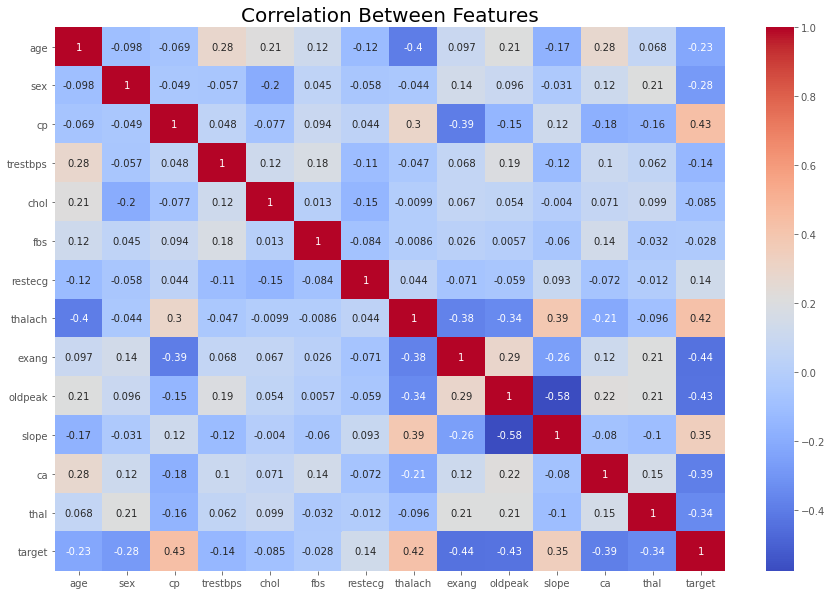

In [18]:
#correlation
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Between Features",fontsize=20)
plt.show()

The features are very less correlated with the target variable. So, we need to take all the features to account the heart disease prognosis. We can ignore two or more features only if they are highly correlated with the target variable.

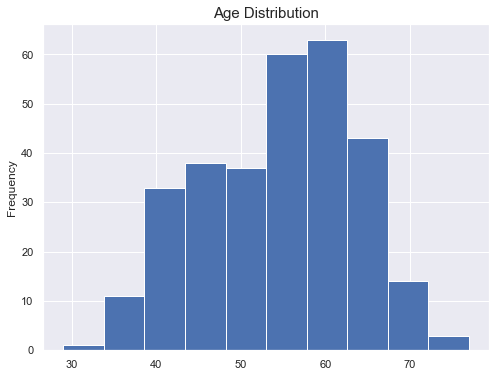

In [159]:
# age distribution -  histogram
plt.figure(figsize=(8,6))
data.Age.plot(kind='hist')
plt.title('Age Distribution',fontsize=15)
plt.show()

The distribution shows that people between the age group of 55-65 have maximum population, i.e, most of the people between 55-65 years went for heart checkups and are most likely to get a heart disease. While, people less than 35 years of age are less likely to suffer from a heart disease.

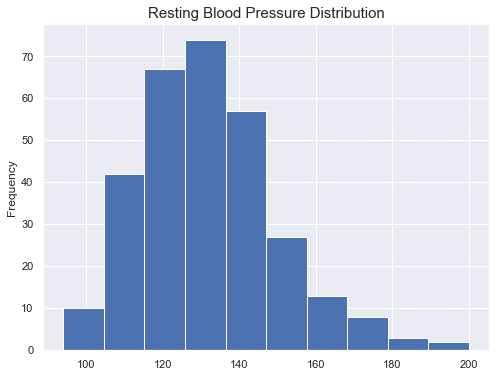

In [158]:
#resting blood pressure -  histogram
plt.figure(figsize=(8,6))
data.Resting_BP.plot(kind='hist')
plt.title('Resting Blood Pressure Distribution',fontsize=15)
plt.show()

Most of the people have their Resting Blood Pressure between 120-150 mmHg. Thus, it is more likely to acquire disease in this range. However, more analysis is required to figure out the same.

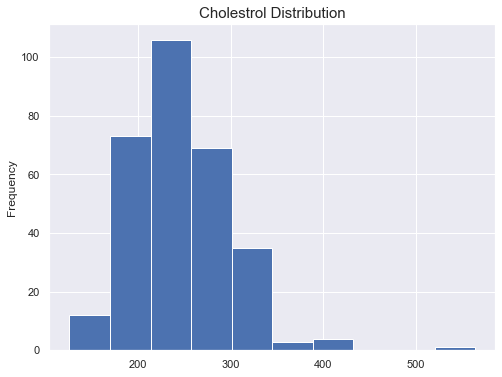

In [157]:
#cholestrol - histogram
plt.figure(figsize=(8,6))
data.Cholesterol.plot(kind='hist')
plt.title('Cholestrol Distribution',fontsize=15)
plt.show()

Cholesterol of most people lie in the range between 200-250 and thus is more prone to disease.

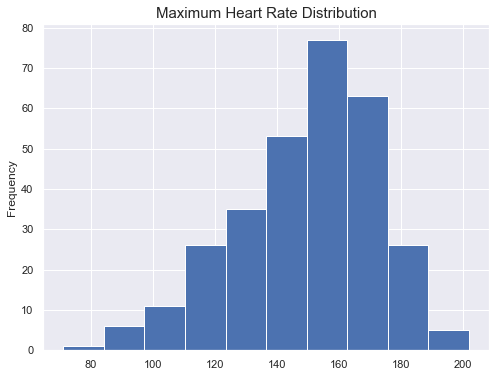

In [156]:
#max heart rate - histogram
plt.figure(figsize=(8,6))
data.Max_HeartRate.plot(kind='hist')
plt.title('Maximum Heart Rate Distribution',fontsize=15)
plt.show()

Many people that went for heart checkup had their maximum blood pressure achived between 155-165 beats per min. Hence, it might be cause for heart disease in most people.

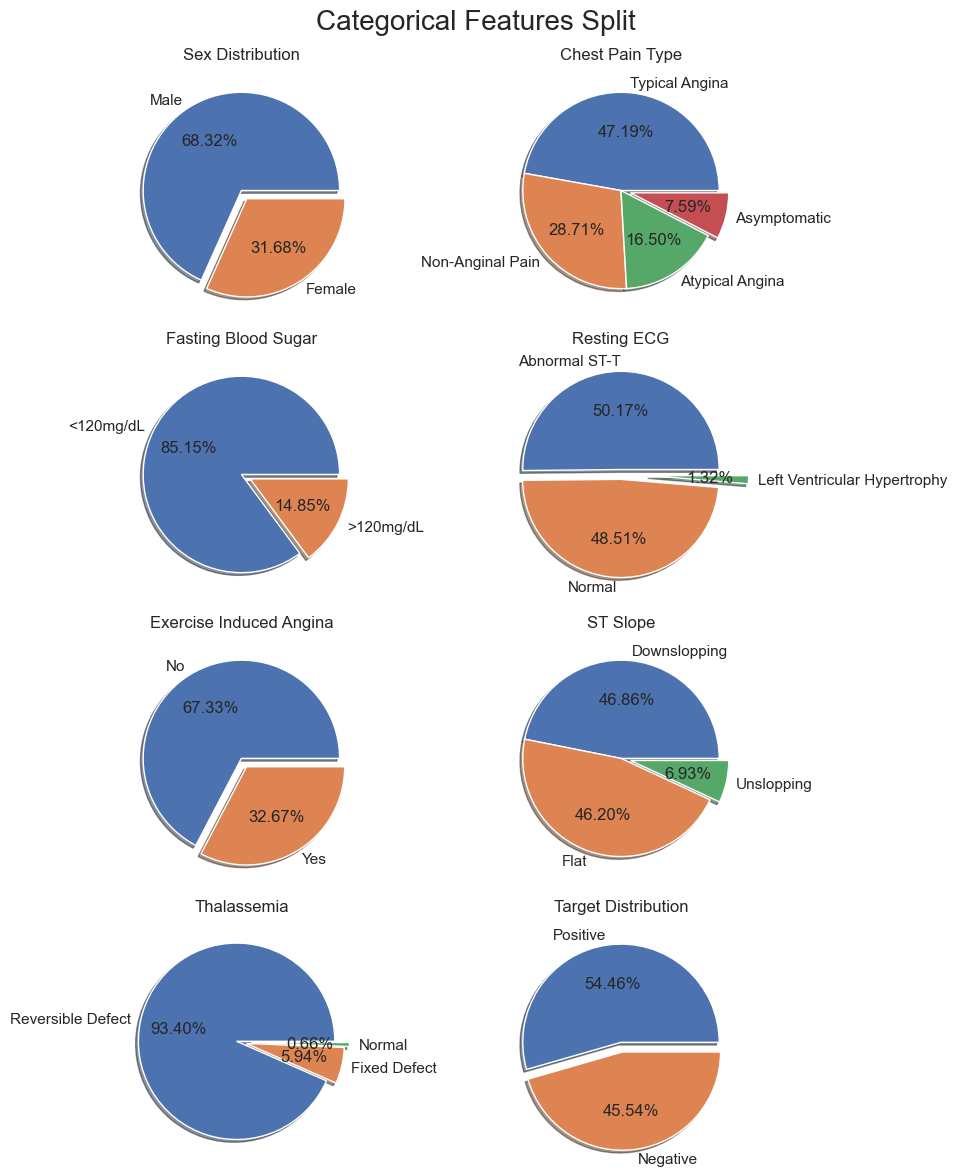

In [168]:
#categorical features distribution - pie charts
fig,axes = plt.subplots(4,2,figsize=(10,12),dpi=100,sharex=True)

axes[0,0].pie(data['Sex'].value_counts(),labels=['Male','Female'],shadow = True, explode = [0,0.1], autopct = '%.2f%%')
axes[0,0].set_title('Sex Distribution')

axes[0,1].pie(data['ChestPain_type'].value_counts(),labels=['Typical Angina','Non-Anginal Pain','Atypical Angina','Asymptomatic'],shadow = True, explode = [0,0,0,0.1], autopct = '%.2f%%')
axes[0,1].set_title('Chest Pain Type')

axes[1,0].pie(data['Fasting_Blood_Sugar'].value_counts(),labels=['<120mg/dL','>120mg/dL'],shadow = True, explode = [0,0.1], autopct = '%.2f%%')
axes[1,0].set_title('Fasting Blood Sugar')

axes[1,1].pie(data['Resting_ECG'].value_counts(),labels=['Abnormal ST-T','Normal','Left Ventricular Hypertrophy'],shadow = True, explode = [0.05,0.05,0.3], autopct = '%.2f%%')
axes[1,1].set_title('Resting ECG')

axes[2,0].pie(data['Exercise_Induced_Angina'].value_counts(),labels=['No','Yes'],shadow = True, explode = [0,0.1], autopct = '%.2f%%')
axes[2,0].set_title('Exercise Induced Angina')

axes[2,1].pie(data['ST_slope'].value_counts(),labels=['Downslopping','Flat','Unslopping'],shadow = True, explode = [0,0,0.1], autopct = '%.2f%%')
axes[2,1].set_title('ST Slope')

axes[3,0].pie(data['Thalassemia'].value_counts(),labels=['Reversible Defect','Fixed Defect','Normal'],shadow = True, explode = [0.05,0.05,0.1], autopct = '%.2f%%')
axes[3,0].set_title('Thalassemia')

axes[3,1].pie(data['Target'].value_counts(),labels=['Positive','Negative'],shadow = True, explode = [0,0.1], autopct = '%.2f%%')
axes[3,1].set_title('Target Distribution')

plt.suptitle("Categorical Features Split",fontsize=20)
plt.tight_layout()
plt.show()

The visualisation shows the percentage of various categories and thus their chances of acquiring the disease may depend on these categories with high percentages.

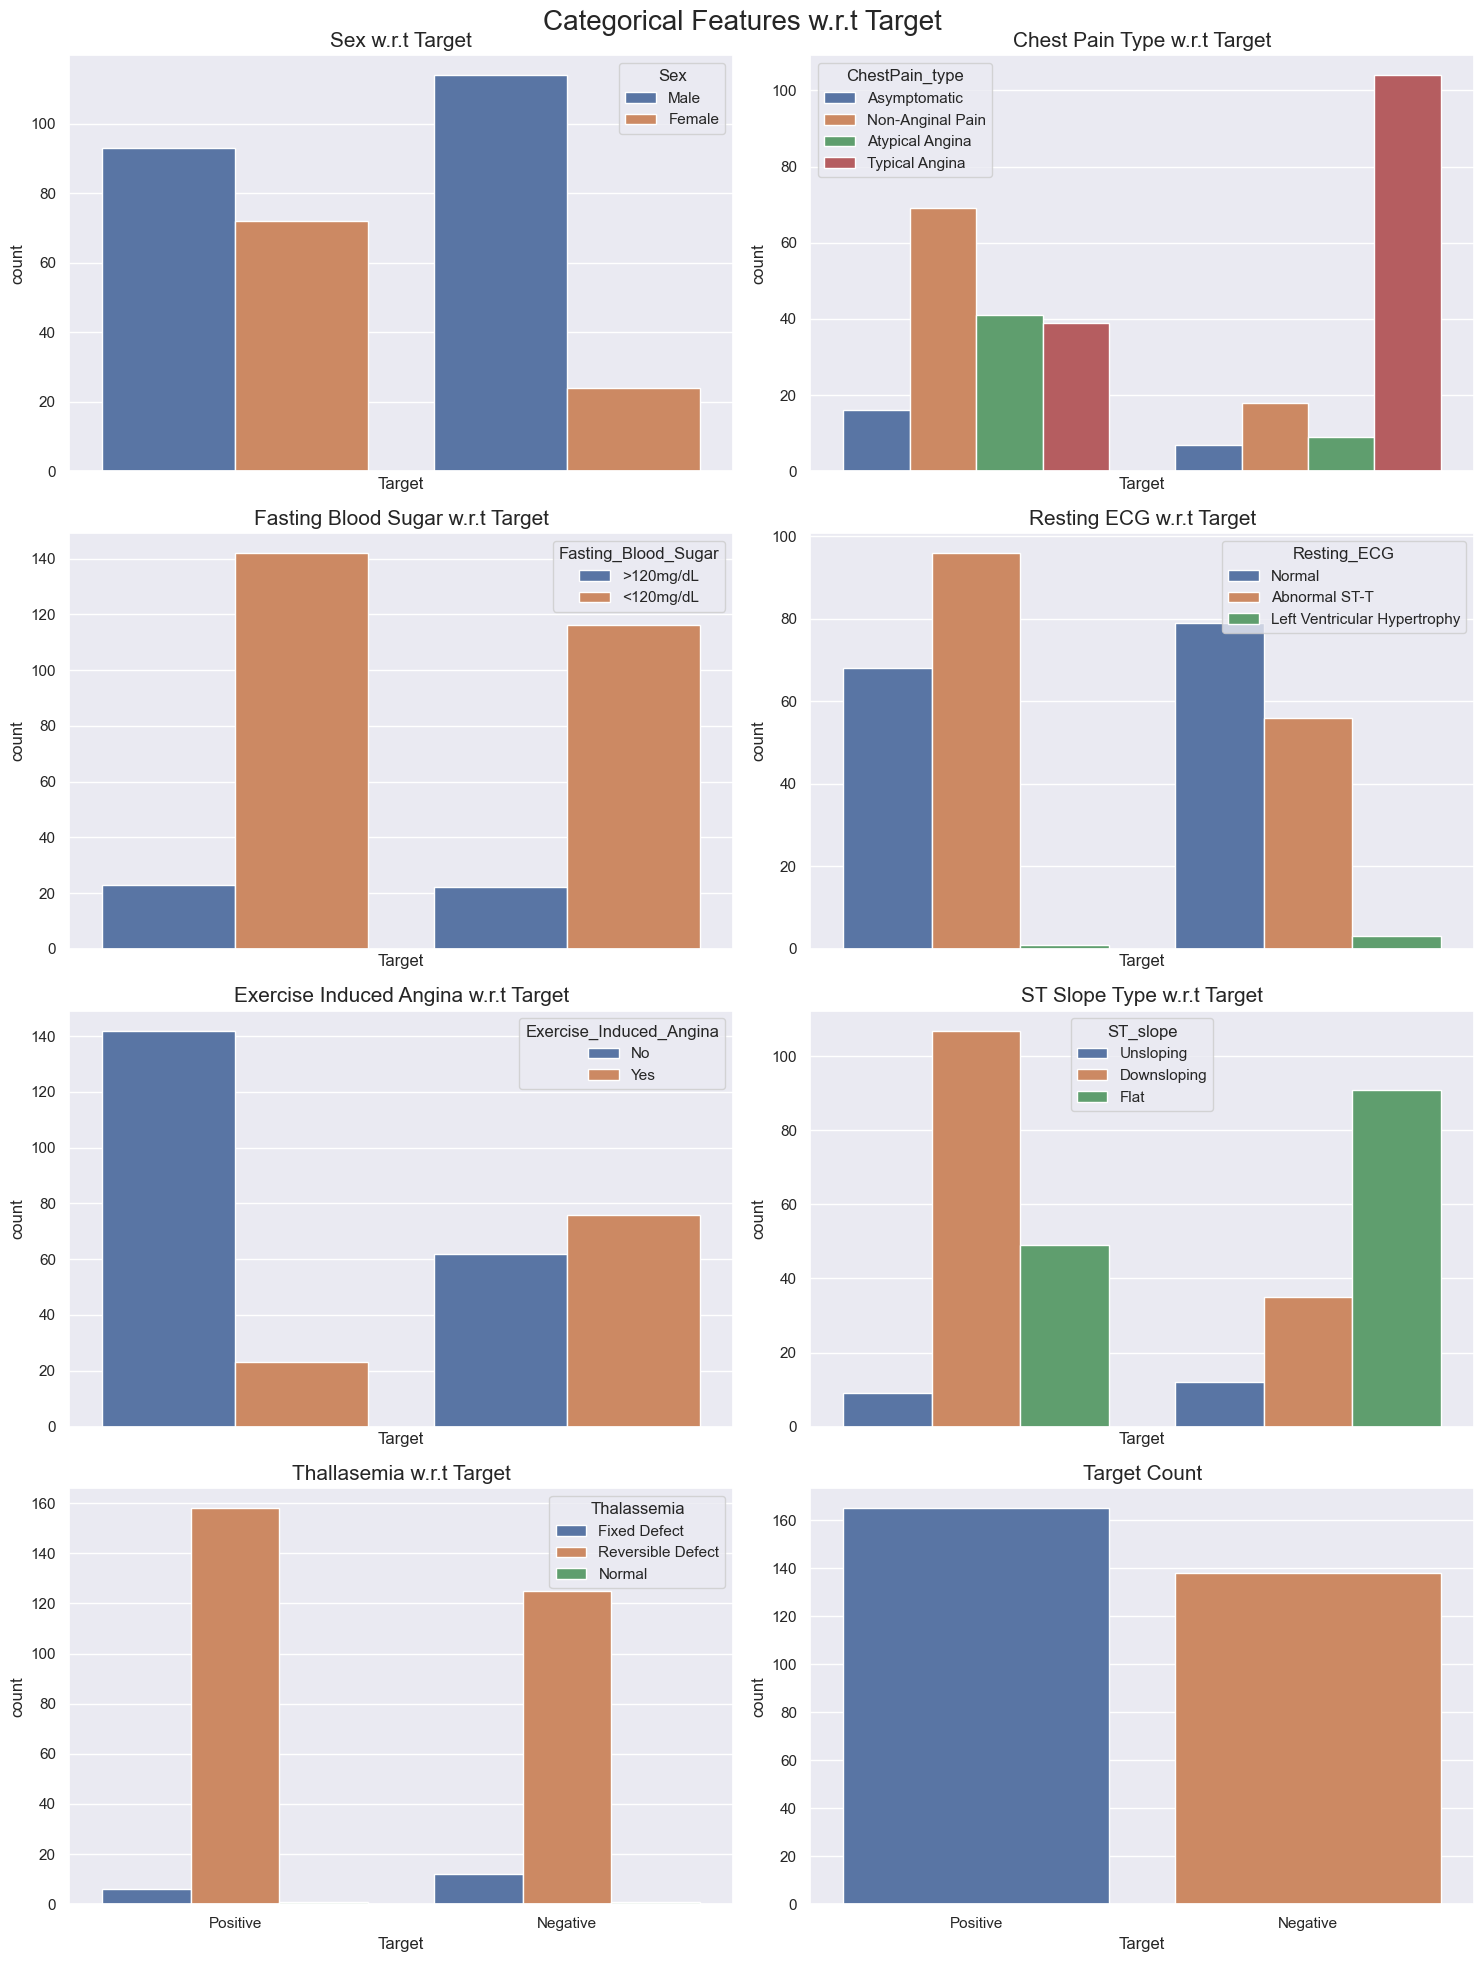

In [154]:
#categorical features w.r.t Target variable - countplots
fig,axes = plt.subplots(4,2,figsize=(15,20),dpi=100,sharex=True)

sns.countplot(x=data['Target'],hue=data['Sex'],ax=axes[0,0])
axes[0,0].set_title('Sex w.r.t Target',fontsize=15)

sns.countplot(x=data['Target'],hue=data['ChestPain_type'],ax=axes[0,1])
axes[0,1].set_title('Chest Pain Type w.r.t Target',fontsize=15)

sns.countplot(x=data['Target'],hue=data['Fasting_Blood_Sugar'],ax=axes[1,0])
axes[1,0].set_title('Fasting Blood Sugar w.r.t Target',fontsize=15)

sns.countplot(x=data['Target'],hue=data['Resting_ECG'],ax=axes[1,1])
axes[1,1].set_title('Resting ECG w.r.t Target',fontsize=15)

sns.countplot(x=data['Target'],hue=data['Exercise_Induced_Angina'],ax=axes[2,0])
axes[2,0].set_title('Exercise Induced Angina w.r.t Target',fontsize=15)

sns.countplot(x=data['Target'],hue=data['ST_slope'],ax=axes[2,1])
axes[2,1].set_title('ST Slope Type w.r.t Target',fontsize=15)

sns.countplot(x=data['Target'],hue=data['Thalassemia'],ax=axes[3,0])
axes[3,0].set_title('Thallasemia w.r.t Target',fontsize=15)

sns.countplot(x=data['Target'],ax=axes[3,1])
axes[3,1].set_title('Target Count',fontsize=15)

plt.suptitle('Categorical Features w.r.t Target',fontsize=20)
plt.tight_layout()
plt.show()

**OUTCOMES :**
1. **Sex** -  Most people who tested for positive for heart disease were men.
2. **Chest Pain Type** - Most people who tested for positive for heart disease has Non Anginal Pain followed by Typical and Atypical Anginal Pain. Very less people with asymptomatic pain ended up with heart disease.
3. **Fasting Blood Sugar** - Most people who tested for positive for heart disease with Fasting blood sugar levels less than 120 mg/dL.
4. **Resting ECG** - Most people who tested for positive for heart disease has abnormal ST-T wave while handsome amount of people with normal ECG also suffered heart disease.
5. **Exercise Induced Angina** - Most people who tested for positive for heart disease did not expierience any pain due to exercise.
6. **ST SLope Type** - Most people who tested for positive for heart disease has downslopping ST wave followed by Flat wave.
7. **Thallasemia** - Most people who tested for positive for heart disease had thallasemia with reversive defect, i.e, that can be treated.
8. **Target** - Almost equal number of people that went for checkups tested positive and negative for heart disease.

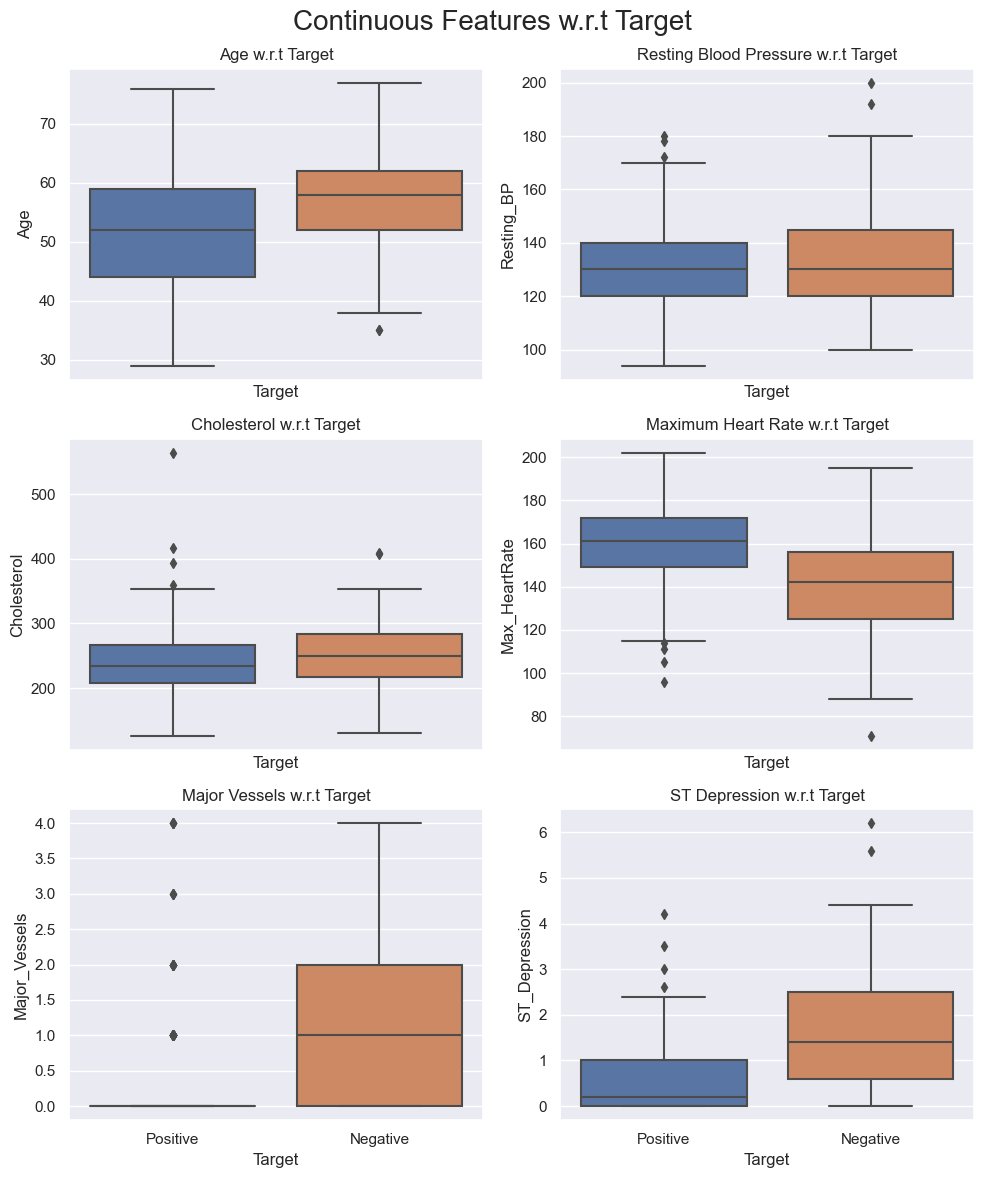

In [153]:
#continuous features w.r.t Target variable - boxplots
fig,axes = plt.subplots(3,2,figsize=(10,12),dpi=100,sharex=True)
sns.set_theme(style='darkgrid')

sns.boxplot(x='Target',y='Age',data=data,ax=axes[0,0])
axes[0,0].set_title('Age w.r.t Target')

sns.boxplot(x='Target',y='Resting_BP',data=data,ax=axes[0,1])
axes[0,1].set_title('Resting Blood Pressure w.r.t Target')

sns.boxplot(x='Target',y='Cholesterol',data=data,ax=axes[1,0])
axes[1,0].set_title('Cholesterol w.r.t Target')

sns.boxplot(x='Target',y='Max_HeartRate',data=data,ax=axes[1,1])
axes[1,1].set_title('Maximum Heart Rate w.r.t Target')

sns.boxplot(x='Target',y='Major_Vessels',data=data,ax=axes[2,0])
axes[2,0].set_title('Major Vessels w.r.t Target')

sns.boxplot(x='Target',y='ST_Depression',data=data,ax=axes[2,1])
axes[2,1].set_title('ST Depression w.r.t Target')

plt.suptitle('Continuous Features w.r.t Target',fontsize=20)
plt.tight_layout()
plt.show()

**OUTCOMES :**
1. **Age** - Max people with heart disease range between age 55-65.
2. **Resting Blood Pressure** - Max people with heart disease have resting blood pressure between 120-140 mmHg.
3. **Cholesterol** - Max people with heart diseasehave cholesterol between 210-270 md/dL.
4. **Maximum Heart Rate Achieved** - Max people with heart disease have their maximum heart rate between 150-170 beats per min.
5. **Major Blood Vessls** - Max people with heart disease had no major vessels visible after coloured fluoroscopy.
6. **ST Depression** - It is the depression induced by exercise relative to rest in mm. Most people with heart disease range this between 0 to 1.

## Model Training and Testing
The output we need to predict is either **Positive** or **Negative** for heart disease. Therefore we will be using **Classification** Technique ML algorithms for prognosis.
There are many classification algorithms that can be used and thus we will be using the following algorithms:
1. KNN Classifier
2. Logistic Regression Classifier
3. Random Forest Classifier

We will then figure out the best algorithm for the problem based on performance metrics in model evaluation.